#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
def roulette():
    return np.random.randint(0, 37)

In [3]:
print(roulette())

23


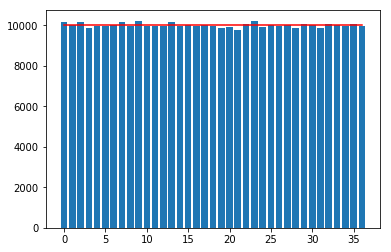

In [4]:
# проверим равновероятность выпадения каждого из 37 целых чисел на интервале [0, 36]
n = 370000
c = Counter([roulette() for _ in range(n)])
x = [i for i in range(37)]
y = [n / 37 for _ in range(37)]
plt.bar(c.keys(), c.values())
plt.plot(x, y, color = 'red')

#### 2. 
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.   

In [5]:
def coin():
    r = np.random.rand()
    if r < 0.5:
        return 0
    else:
        return 1

In [6]:
# проверим теорему сложения вероятностей
# Теорема о сложении вероятностей.
# Вероятность появления одного из двух несовместных событий равна сумме вероятностей этих событий.
# P(A+B) = P(A) + P(B)

In [7]:
# проведем серию испытаний (бросков монеты):
n = 10
results = np.array([coin() for _ in range(n)])
heads = results[results == 1]
tails = results[results == 0]

In [8]:
# P(A) = m/n, где m - кол-во выпадений орла (1), n - общее кол-во испытаний
# P(B) = k/n, где k - кол-во выпадений решки (0), n - общее кол-во испытаний
# P(A+B) = P(A) + P(B) = m/n + k/n = (m+k)/n
m, k = len(heads), len(tails)
p = (m + k) / n

In [9]:
# так как при подбрасывании монеты произойдет одно из двух событий: выпадение орла (1) или решки (0)
# предпологаем, что монета честная, случай падения на ребро не рассматриваем
# то P(A+B) = P(A) + P(B) = 1/2 + 1/2 = 1
# проверим:
P = 1/2 + 1/2
print(P == p)

True


In [10]:
# подставим полученные выражения в формулу суммы вероятностей двух несовместных событий,
# получаем тождество 1 = 1
# теорема доказана

2) Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [11]:
# сгенерируем n выборок m случайных чисел и запишем результат в массив:
n = 10
m = 10
samples = np.array([np.random.randint(0, 100, m) for _ in range(n)])

In [12]:
print(samples)

[[13 43 40 19 45 64 46 83 20 51]
 [90  0 90 96 93 78  8 38 62 47]
 [44 63 58 82 94 26 80 79 39 44]
 [48 68 18 35 49  8 80 93 57 48]
 [49  4  1 14 93 30 79 69 26 77]
 [68 13  1 26 26 35 98 41 92 78]
 [44 18 41 16 62 48  7  8 58 40]
 [18 78 54 66 31 82 66 89 72 87]
 [82  6 32 16 56  6 83 62 64 11]
 [58 27 49 66 63 93 63 17 33 95]]


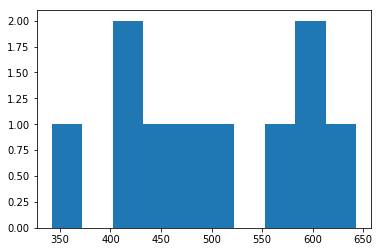

In [13]:
# построим гистограмму распредления суммы случайных величин:
plt.hist(np.array([np.sum(x) for x in samples]))
plt.show()

In [14]:
# увеличим число n выборок m случайных величин
n = 1000
m = 10
samples = np.array([np.random.randint(0, 100, m) for _ in range(n)])

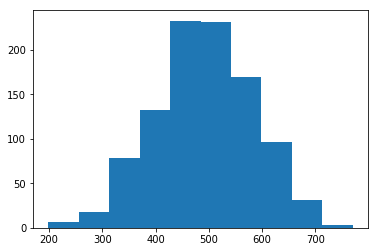

In [15]:
# построим гистограмму распредления суммы случайных величин:
plt.hist(np.array([np.sum(x) for x in samples]))
plt.show()

In [16]:
# при увеличении кол-ва выборок из m случайных величин,
# распределение суммы данных величин имеет вид близкий к нормальному распределению
# это следует из ЦПТ:
# Центра́льные преде́льные теоре́мы (Ц. П. Т.) — класс теорем в теории вероятностей, утверждающих,
# что сумма достаточно большого количества слабо зависимых случайных величин,
# имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует,
# не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

#### 3.
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [17]:
def Bernoulli(n, k):
    C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
    p = 1 / 2
    q = 1 - p
    return C * np.power(p, k) * np.power(q, n - k)

In [18]:
k, n = 0, 100000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
# print(a, b, c, d)
# print(x)
# print(k, n, k/n)
print(f'Monte Carlo: {np.round(k / n, 4)},  Bernoulli: {np.round(Bernoulli(4, 2), 4)}')

Monte Carlo: 0.3737,  Bernoulli: 0.375


2) Повторите расчеты, взяв другие значения n и k.

In [19]:
k, n = 0, 100000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
x = a + b + c + d + e + f
for i in range(0, n):
    if x[i] == 3:
        k = k + 1
# print(a, b, c, d)
# print(x)
# print(k, n, k/n)
print(f'Monte Carlo: {np.round(k / n, 4)},  Bernoulli: {np.round(Bernoulli(6, 3), 4)}')

Monte Carlo: 0.3128,  Bernoulli: 0.3125


#### 4. Повторите расчеты, взяв другие значения n и k.

In [20]:
k, n = 0, 100000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
g = np.random.randint(0, 2, n)
h = np.random.randint(0, 2, n)
x = a + b + c + d + e + f + g + h
for i in range(0, n):
    if x[i] == 6:
        k = k + 1
# print(a, b, c, d)
# print(x)
# print(k, n, k/n)
print(f'Monte Carlo: {np.round(k / n, 4)},  Bernoulli: {np.round(Bernoulli(8, 6), 4)}')

Monte Carlo: 0.11,  Bernoulli: 0.1094


#### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Pearson correlation coefficient:
def R(x, y):
    a = np.sum((x - np.mean(x))*(y - np.mean(y)))
    b = np.sqrt(np.sum(np.power(x - np.mean(x), 2))*np.sum(np.power(y - np.mean(y), 2)))
    return a / b

0.7409442475097716 0.13587652352812563
0.7409442475097714 0.13587652352812563


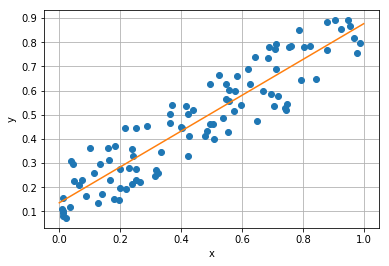

R: 0.9231


In [23]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y)) / (np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=-1)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()
print(f'R: {np.round(R(x, y), 4)}')